# MEA stimulation

This notebook shows how to simulate the electric potential generated by electrode currents using a MEA object. Stimulation is performed by means of currents. Voltage stimulation is not implemented as it strongly depends on the electrode itself (e.g. faradaic/capacitive).

In [75]:
import MEAutility as MEA
import matplotlib.pylab as plt
import numpy as np

First, let's instantiate a MEA object among the available MEA models:

In [76]:
MEA.return_mea()

Available MEA: 
 ['SqMEA-15-10um', 'SqMEA-6-25um', 'Neuronexus-32-cut-30', 'SqMEA-5-30um', 'Neuropixels-384', 'SqMEA-10-15um', 'Neuropixels-128', 'SqMEA-7-20um', 'Neuronexus-32-Kampff', 'Neuroseeker-128', 'tetrode', 'Neuropixels-24', 'Neuronexus-32', 'Neuroseeker-128-Kampff', 'tetrode_mea']


In [77]:
sqmea = MEA.return_mea('SqMEA-10-15um')

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi


By default, the stimulation `model` is set to `semi`. This is the default for MEA objects of type `mea` and it models that currents radiate only on one side of the probe (the MEA is considered as an infinite insulating plane). The underlying assumption is that ground is infinitely far away.
In this case the electric potential at point $\overrightarrow{r}$ generated by the electrode currents $I_i$ is (electrode positions are $\overrightarrow{r_i}$):

$$V(\overrightarrow{r}) = \sum_i \frac{I_i}{2\sigma\pi |\overrightarrow{r} - \overrightarrow{r_i}|}$$

where $\sigma$ is the tissue conductivity.

Instead, for mea type `wire`, the tissue is assumed to be infinite and homogeneous, that is the probe has no effect on the electric potential and currents radiate in all directions:

$$V(\overrightarrow{r}) = \sum_i \frac{I_i}{4\sigma\pi |\overrightarrow{r} - \overrightarrow{r_i}|}$$

## Conventions

- currents are in $nA$
- distances and positions are in $\mu m$
- electric potentials are in $mV$

## Handling currents 

MEA currents can be easily accessed and changed in various ways:

In [78]:
# check currents
print(sqmea.currents)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [79]:
# set currents with an array 
curr = np.arange(sqmea.number_electrodes)
sqmea.currents = curr
print(sqmea.currents)

#set currents with a list
curr = list(curr)
sqmea.currents = curr
print(sqmea.currents)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


In [80]:
# reset currents to 0
sqmea.reset_currents()
print(sqmea.currents)

# reset currents to 100
sqmea.reset_currents(100)
print(sqmea.currents)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.]


[ 973.91615691 1016.83720943 1089.49043841 1139.8579249   927.79316233
 1000.89661725 1047.3334144  1051.8497402   927.37268018  996.62983039
 1016.49251336 1043.75742297 1004.9168758   940.30748105 1054.53993841
  973.75422086  983.60405175 1042.34697708 1040.74580548 1014.98436691
 1001.8608754   995.65886874 1012.95710254  970.06809296  927.99036328
  999.92788465 1049.19541344  997.14646988 1039.79123706  984.20047048
  930.55017661 1009.74184644 1023.24453635 1018.02056444 1049.41097968
 1017.43562542 1062.60398159  973.51622737 1053.37464287  892.22969949
  999.73394752 1012.93137879  980.73150404  953.77253661  951.55426365
  905.11921863 1107.92750924  913.69396055 1077.18729127  962.6261477
 1043.49287399  952.72622053  993.51633173 1029.79201114 1014.65998008
  986.78997864 1007.9228314   973.1521672  1039.92862132  993.2816604
 1058.30275146  951.99364936 1047.30143561 1004.77930621 1010.1738069
  960.06196844  991.50504623  999.62108637 1037.74033168 1022.7296349
 1016.3131

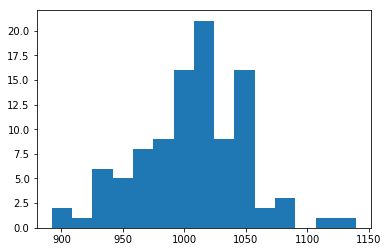

In [81]:
# random values with a certain amplitude and standard deviation
sqmea.set_random_currents(mean=1000, sd=50)
print(sqmea.currents)
_ = plt.hist(sqmea.currents, bins=15)

For Rectangular MEAs, currents can be handled with matrices:

In [82]:
print(sqmea.get_current_matrix())
print('Shape: ', sqmea.get_current_matrix().shape)

[[ 973.91615691 1016.49251336 1001.8608754   930.55017661  999.73394752
  1043.49287399 1058.30275146 1016.31311019 1010.57269555 1026.14202785]
 [1016.83720943 1043.75742297  995.65886874 1009.74184644 1012.93137879
   952.72622053  951.99364936 1020.75966681 1019.66052338 1016.49830716]
 [1089.49043841 1004.9168758  1012.95710254 1023.24453635  980.73150404
   993.51633173 1047.30143561 1039.98604723  977.72552581 1012.46829058]
 [1139.8579249   940.30748105  970.06809296 1018.02056444  953.77253661
  1029.79201114 1004.77930621  937.02190389 1043.29217666 1041.29563699]
 [ 927.79316233 1054.53993841  927.99036328 1049.41097968  951.55426365
  1014.65998008 1010.1738069  1050.16695834  988.32520744 1010.75733243]
 [1000.89661725  973.75422086  999.92788465 1017.43562542  905.11921863
   986.78997864  960.06196844 1041.47298494 1003.95374263 1005.74013272]
 [1047.3334144   983.60405175 1049.19541344 1062.60398159 1107.92750924
  1007.9228314   991.50504623 1057.30344821 1088.5345568  

In [83]:
current_of_zeros = np.zeros((10,10))
print(current_of_zeros)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [84]:
sqmea.set_current_matrix(current_of_zeros)
sqmea.get_current_matrix()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Single currents can be set separately either by:

In [85]:
# set elecectrode 50 current to 10000
sqmea.set_current(24, 10000)
sqmea.currents

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
       10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])

Or by using matrix notation for rectangular MEAs. This makes it easy, for example, to create multipolar current sets.

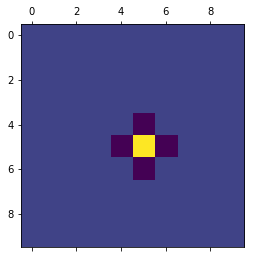

In [86]:
# reset elecectrode 50 current to 0
sqmea.set_current(24, 0)
center_electrode = sqmea.dim[0]//2

# build a multipolar current set
sqmea[center_electrode][center_electrode].current = 8000
sqmea[center_electrode+1][center_electrode].current = -2000
sqmea[center_electrode-1][center_electrode].current = -2000
sqmea[center_electrode][center_electrode+1].current = -2000
sqmea[center_electrode][center_electrode-1].current = -2000

_ = plt.matshow(sqmea.get_current_matrix())

## Stimulation

Once currents are set, electric potentials can be computed with the `compute field` function.
Let's first create a bunch of 3d points, for example, on a straight line from close to the active electrode.

In [87]:
center_pos = sqmea[center_electrode][center_electrode].position
print(center_pos)

[0.  7.5 7.5]


In [88]:
npoints = 1000
x_vec = np.linspace(5, 100, npoints)
y_vec = [center_pos[1]] * npoints
z_vec = [center_pos[2]] * npoints

points = np.array([x_vec, y_vec, z_vec]).T
# points should be a np.array (or list) o npoints x 3
print(points.shape)
print(points)

(1000, 3)
[[  5.           7.5          7.5       ]
 [  5.0950951    7.5          7.5       ]
 [  5.19019019   7.5          7.5       ]
 ...
 [ 99.80980981   7.5          7.5       ]
 [ 99.9049049    7.5          7.5       ]
 [100.           7.5          7.5       ]]


Now, we can compute the electric potential:

In [89]:
# multipolar currents
Vp_multi = sqmea.compute_field(points)

and compare the field generated by a single electrode (monopolar current source).

In [90]:
# monopolar currents
sqmea.reset_currents()
sqmea[5][5].current = 8000
Vp_mono = sqmea.compute_field(points)

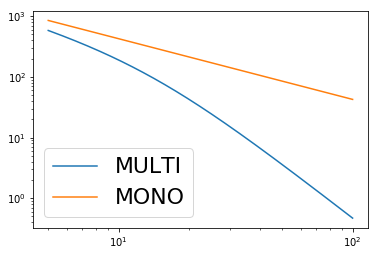

In [91]:
_ = plt.loglog(x_vec, Vp_multi, label='MULTI')
_ = plt.loglog(x_vec, Vp_mono, label='MONO')
_ = plt.legend(fontsize=22)

The potential fall for the multipolar is faster than the monopolar configuration (which is linear in log scale)!

## Finite electrode effect

So far, we assumed that the electrodes were point sources, but this is of course not the case as they have a finite size. In some cases the finite size of the electrode may be taken into consideration. In order to do so, one can set the variable `points_per_electrode` of the MEA object to the number of points within the electrode in which the entire electrode current is split. 

Let's take a look at an example:

In [92]:
sqmea_r = MEA.return_mea('SqMEA-5-30um')
center_electrode = sqmea_r.dim[0] // 2

# Activate all electrodes
sqmea_r.set_random_currents(mean=0, sd=10000)
reduced_points = points[:10]

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi


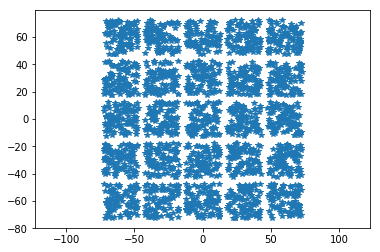

In [93]:
sqmea_r.points_per_electrode = 100

# compute electric potential and return stimulation points
vp, stim_points = sqmea_r.compute_field(reduced_points, return_stim_points=True)
_  = plt.plot(stim_points[:, 1], stim_points[:, 2], '*')
_ = plt.axis('equal')

The stimulation points are within the electrode `square`. Stimulation positions are consistent with after probe shifts and rotations:

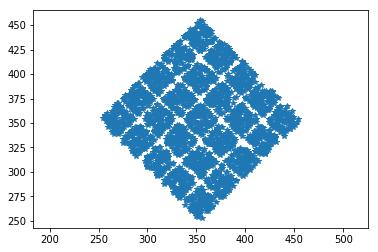

In [94]:
sqmea_r.move([0,500,0])
sqmea_r.rotate([1, 0, 0], 45)

# compute electric potential and return stimulation points
vp, stim_points = sqmea_r.compute_field(reduced_points, return_stim_points=True)
_  = plt.plot(stim_points[:, 1], stim_points[:, 2], '*')
_ = plt.axis('equal')

The effect of the electrode finite size on the electric potential in proximity of the stimulation site is shown in the `MEA_plotting` section.

## Temporal dynamics

So far, we used _static_ currents, but the effect of current dynamics can be very important for exciting neurons.
Temporal vatying currents can be easily implemented with the MEAutility package.

Let's instantiate a new MEA object and set a monopolar biphasic source with 2 pulses:

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi


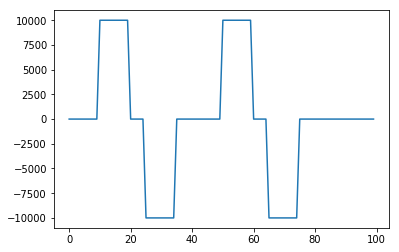

In [97]:
sqmea = MEA.return_mea('SqMEA-10-15um')
center_electrode = sqmea.dim[0] // 2

ntimes = 100
bipolar_source = np.zeros(ntimes)
bipolar_source[10:20] = 10000
bipolar_source[25:35] = -10000
bipolar_source[50:60] = 10000
bipolar_source[65:75] = -10000

_ = plt.plot(bipolar_source)

In [98]:
# the current can be set directly accessing the electrode current
sqmea[center_electrode][center_electrode].current = bipolar_source

# OR

# using set_current() (get_linear_id returns the index of the matrix in the linear array)
sqmea.set_current(sqmea.get_linear_id(center_electrode+2, center_electrode+2), bipolar_source)

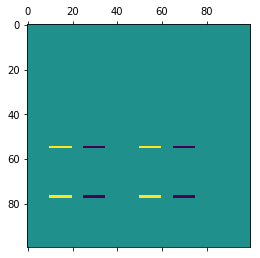

In [99]:
_ = plt.matshow(sqmea.currents)

Computing the electrical potential returns un array when currents have temporal dynamics:

In [103]:
vp = sqmea.compute_field(points[:100])

(100, 100)


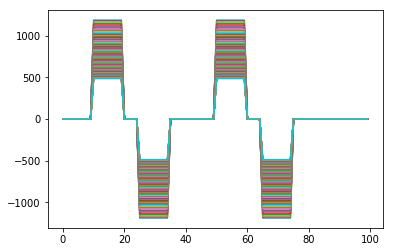

In [104]:
print(vp.shape)
_ = plt.plot(vp.T)

As expected the potential becomes lower moving further away from the probe!